# <center>Managing Merger Trees with `ytree`</center>
### <center>Britton Smith</center>
#### <center>Stobie Talk - 7 June, 2019</center>

## <center>Halo Assembly as a Merger Tree</center>

<p>

<center><img src="talk.png" alt="Drawing" style="height: 80%;width: 80%"/></center>

## Many Codes, Many File Formats
* <font color='red'>Amiga halo finder</font>: separate ascii files for tree and halo properties for each snapshot
* <font color='red'>consistent-trees</font>: a single ascii file with all trees and properties
* <font color='red'>LHaloTree</font>: all tree and halo properties in a series of binary files with supplemental ascii files
* <font color='red'>Rockstar halo finder</font>: ascii files with tree and halo properties for each snapshot
* many more...

## `ytree`: `yt` for merger trees

In [1]:
import ytree

### One command to load them all

In [2]:
# consistent-trees
arbor = ytree.load("consistent_trees/tree_0_0_0.dat")
# arbor = ytree.load("rockstar/rockstar_halos/out_0.list")
# arbor = ytree.load("ahf_halos/snap_N64L16_000.parameter",
#                hubble_constant=0.7)
# arbor = ytree.load("lhalotree/trees_063.0")

Performance will be improved by saving this arbor with "save_arbor" and reloading:
	>>> a = ytree.load("consistent_trees/tree_0_0_0.dat")
	>>> fn = a.save_arbor()
	>>> a = ytree.load(fn)


### `Arbor`: a collection of trees
The arbor store all trees as a NumPy array.

In [3]:
# How many trees in this dataset?
print(arbor.size)

Loading tree roots: 100%|██████████| 5105985/5105985 [00:00<00:00, 242760100.54it/s]

327


### Accessing a tree

In [4]:
print(arbor[0])
print(arbor[0]['mass'])
print(arbor[0]['redshift'])

TreeNode[12900]
657410071942446.1 Msun
0.0


### A tree is a collection of linked `TreeNode` objects

In [5]:
mytree = arbor[0]
print("Me:", mytree)
print("My ancestors:", mytree.ancestors)
print("My ancestor's descendent (me):", mytree.ancestors[0].descendent)

Me: TreeNode[12900]
My ancestors: [TreeNode[12539]]
My ancestor's descendent (me): TreeNode[12900]


### Accessing all members of a tree

The `tree` keyword will return all halos in the tree.

The `prog` keyword will return only the main progenitors of the tree.

In [6]:
print("Halos in this tree: ", mytree["tree"].size)
print("Main progenitors of the tree: ", mytree["prog"].size)

Halos in this tree:  83
Main progenitors of the tree:  48


### Properties for a tree

In [7]:
print(mytree['prog', 'virial_radius'].to('Mpc/h'))

[1.583027 1.592008 1.599495 1.606476 1.608225 1.620332 1.630154 1.633193
 1.635991 1.643129 1.641243 1.638572 1.629812 1.617422 1.607159 1.601904
 1.590729 1.58484  1.571293 1.54282  1.503005 1.50288  1.48112  1.473812
 1.484933 1.491288 1.491632 1.503691 1.515647 1.496365 1.484111 1.448162
 1.456155 1.449893 1.419253 1.363171 1.249753 1.169597 1.115875 1.053721
 0.988011 0.989242 0.975874 0.960079 0.967607 0.947434 0.910717 0.874321] Mpc/h


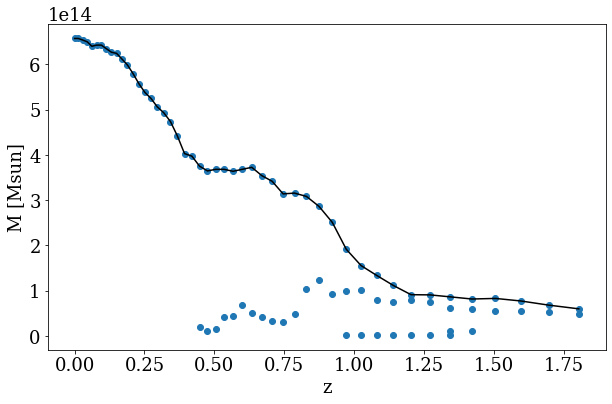

In [8]:
from matplotlib import pyplot
%matplotlib inline
pyplot.rcParams['figure.figsize'] = (10, 6)
pyplot.rcParams['font.size'] = 18

pyplot.scatter(mytree["tree", "redshift"], mytree["tree", "mass"])
pyplot.plot(mytree["prog", "redshift"], mytree["prog", "mass"], color="black")
pyplot.xlabel("z")
pyplot.ylabel("M [Msun]")
pyplot.show()

### Define your own properties

In [9]:
import yt
def _potential_field(field, data):
    return yt.physical_constants.G * data['mass'] / data['virial_radius']

In [10]:
arbor.add_derived_field("potential", _potential_field, 'erg/g')

In [11]:
print(mytree['prog', 'potential'])

[1.24126726e+16 1.23426489e+16 1.22203449e+16 1.20949603e+16
 1.18972904e+16 1.18561697e+16 1.17847340e+16 1.16179755e+16
 1.14561523e+16 1.13592729e+16 1.11443556e+16 1.09236810e+16
 1.06314431e+16 1.03034063e+16 1.00133040e+16 9.79647516e+15
 9.51383318e+15 9.30224671e+15 9.01295118e+15 8.56324590e+15
 8.01466081e+15 7.90372522e+15 7.57268348e+15 7.39721666e+15
 7.41132556e+15 7.37974281e+15 7.29154569e+15 7.31887196e+15
 7.34910012e+15 7.07879498e+15 6.88223811e+15 6.47992625e+15
 6.47979821e+15 6.35650923e+15 6.02708652e+15 5.50210161e+15
 4.58021992e+15 3.97486069e+15 3.58272135e+15 3.16592498e+15
 2.75881716e+15 2.74234192e+15 2.64681779e+15 2.54164461e+15
 2.56231650e+15 2.43848171e+15 2.23740228e+15 2.04869147e+15] erg/g


### Re-save the arbor to an optimized format

In [12]:
fn = arbor.save_arbor()

Reading root fields: 100%|██████████| 327/327 [00:00<00:00, 1617.43it/s]
yt : [INFO     ] 2020-02-14 12:34:47,241 Saving field data to yt dataset: arbor/arbor.h5.
Creating field arrays [1/1]: 100%|██████████| 613895/613895 [00:00<00:00, 5683633.69it/s]
yt : [INFO     ] 2020-02-14 12:34:48,293 Saving field data to yt dataset: arbor/arbor_0000.h5.


In [13]:
new_arbor = ytree.load(fn)

### Or save a single tree

In [14]:
treefn = mytree.save_tree()
new_tree = ytree.load(treefn)

yt : [INFO     ] 2020-02-14 12:34:48,506 Saving field data to yt dataset: tree_12900/tree_12900.h5.
Creating field arrays [1/1]: 100%|██████████| 4897/4897 [00:00<00:00, 3223400.30it/s]
yt : [INFO     ] 2020-02-14 12:34:48,575 Saving field data to yt dataset: tree_12900/tree_12900_0000.h5.


### A lot more...

## `ytree` Resources

* Installation:
```
pip install ytree
```
* Documentation:
```
ytree.readthedocs.io
```
    * sample data available
* Source code:
```
github.com/brittonsmith/ytree
```
* The `yt` Project: `yt-project.org`